In [262]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [263]:
sns.set_style('ticks')

In [264]:
data = pd.read_csv("./data/train_home_price.csv")
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [265]:
len(data.columns)

81

In [266]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [267]:
null_ranked = pd.DataFrame(data.isnull().sum(), columns  = ['sum of null value']).sort_values(by = "sum of null value", ascending=False).iloc[:38]
# terlihat bahwa PoolQC merupakan atribut dengan jumlah nilai nukll terbanyak dan hanya 6 baris dari  kolom PoolQC yang terisi
null_ranked

,sum of null value
PoolQC,1453
MiscFeature,1406
Alley,1369
Fence,1179
FireplaceQu,690
LotFrontage,259
GarageYrBlt,81
GarageCond,81
GarageType,81
GarageFinish,81


In [268]:
object_type = [(column, value) for column, value in zip(null_ranked.index, null_ranked['sum of null value']) if data[column].dtype == "object"]
object_type

[('PoolQC', 1453),
 ('MiscFeature', 1406),
 ('Alley', 1369),
 ('Fence', 1179),
 ('FireplaceQu', 690),
 ('GarageCond', 81),
 ('GarageType', 81),
 ('GarageFinish', 81),
 ('GarageQual', 81),
 ('BsmtFinType2', 38),
 ('BsmtExposure', 38),
 ('BsmtQual', 37),
 ('BsmtCond', 37),
 ('BsmtFinType1', 37),
 ('MasVnrType', 8),
 ('Electrical', 1),
 ('Functional', 0),
 ('KitchenQual', 0),
 ('PavedDrive', 0)]

In [269]:
get_correlation = pd.DataFrame(abs(data.corr()['SalePrice']).sort_values(ascending = False))
get_correlation

C:\Users\Teddy Dharma\AppData\Local\Temp\ipykernel_16308\678660266.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  get_correlation = pd.DataFrame(abs(data.corr()['SalePrice']).sort_values(ascending = False))


,SalePrice
SalePrice,1.000000
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
FullBath,0.560664
TotRmsAbvGrd,0.533723
YearBuilt,0.522897


C:\Users\Teddy Dharma\AppData\Local\Temp\ipykernel_16308\2197120319.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(pd.DataFrame(data.corr()), annot=True)


<Axes: >

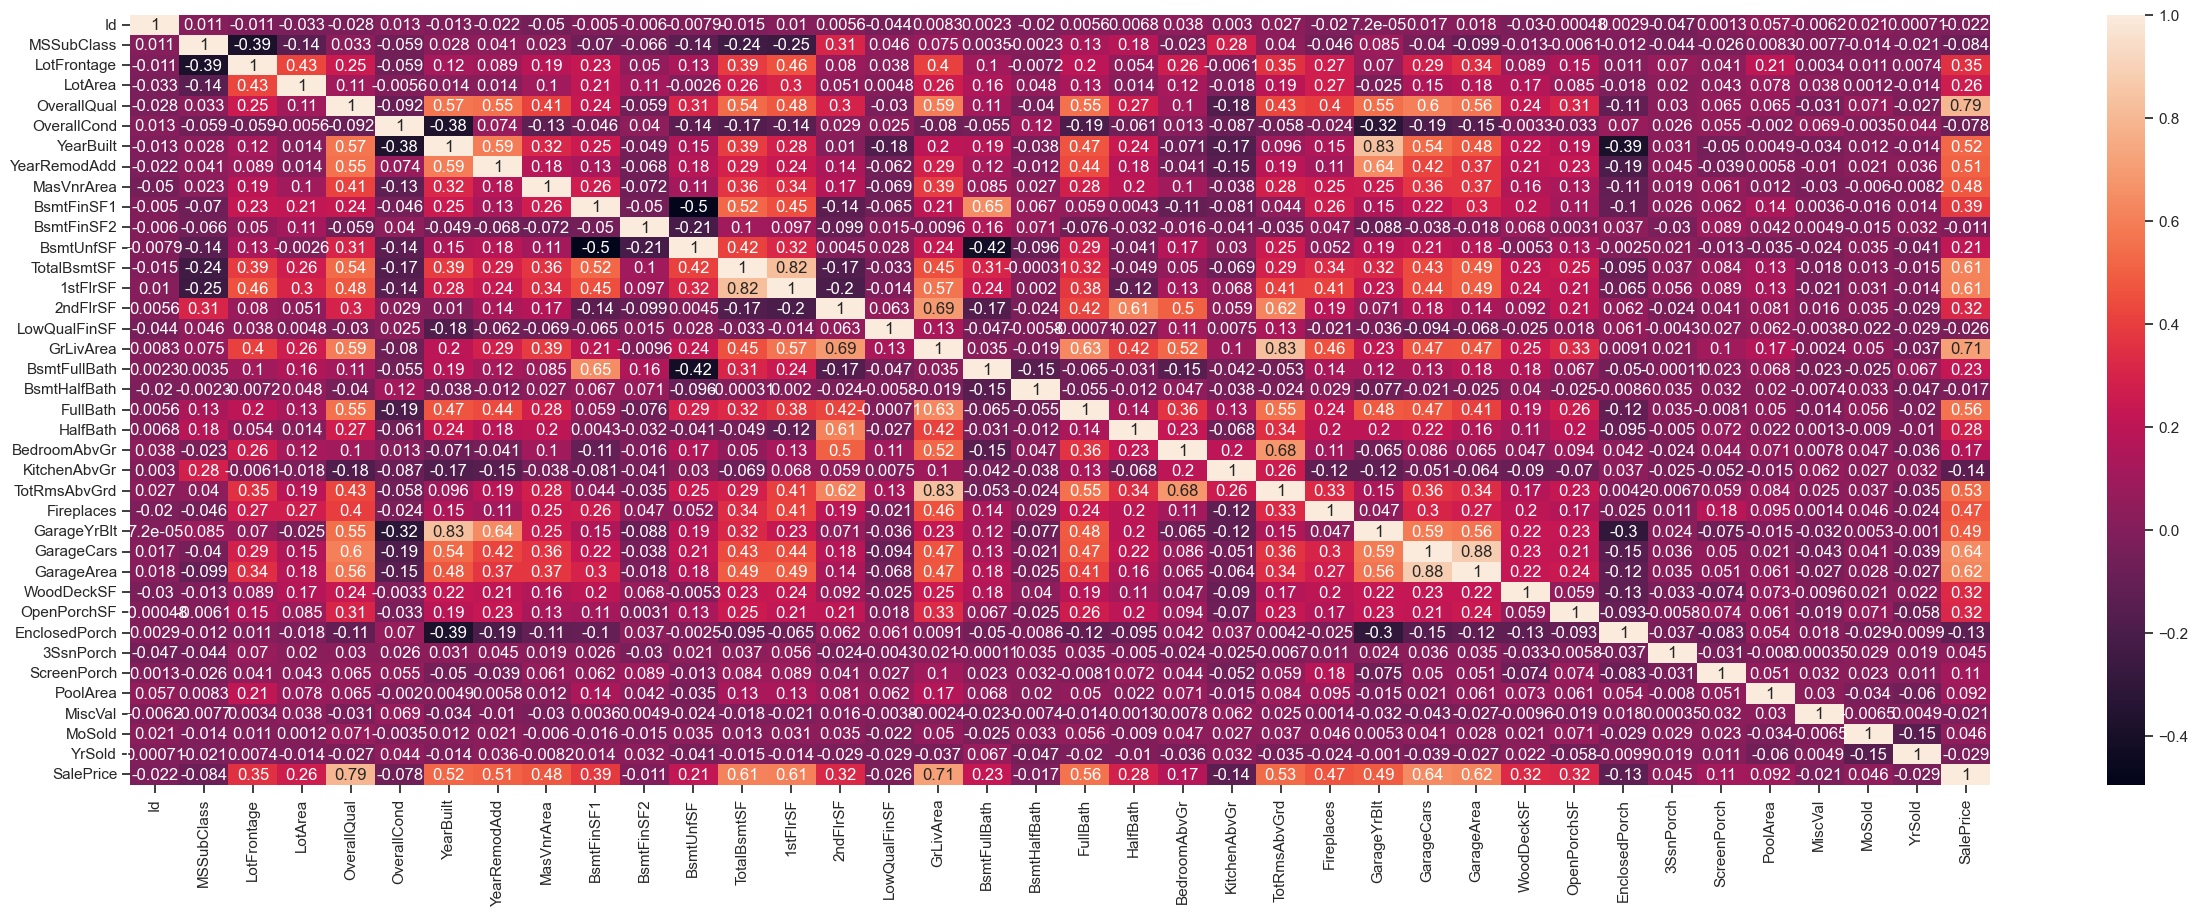

In [270]:
fig, ax = plt.subplots(figsize = (30, 10))
sns.heatmap(pd.DataFrame(data.corr()), annot=True)

In [271]:

def get_correlation(data) -> pd.DataFrame:
    get_correlation = pd.DataFrame(abs(data.corr()['SalePrice']).sort_values(ascending = False))
    return get_correlation

def drop_column(data: pd.DataFrame, correlation_score: pd.DataFrame, null_ranked: pd.DataFrame) -> pd.DataFrame:
    # Hapus kolom berdasarkan jumlah nilai yang null
    for column in null_ranked.index:
        if null_ranked.loc[column, 'sum of null value'] > 100:
            data.drop(column, axis=1, inplace=True)
    # Hapus kolom berdasarkan nilai korelasi jika korlasi lebih keicil  dari 20% 
    for column in correlation_score.index:
        if correlation_score.loc[column, 'SalePrice'] < 0.10:
            data.drop(column, axis=1, inplace=True)
    #  return dataframe
    return data
    
# def drop_row(data: pd.DataFrame) -> pd.DataFrame: 

def convert_object_to_numeric(data : pd.DataFrame) -> pd.DataFrame: 
    dict_encode = {}
    for column in data.columns: 
        if data[column].dtype == "object": 
            le = LabelEncoder()
            le.fit(data[column])
            for uniq_val in data[column].unique(): 
                dict_encode[uniq_val] =  le.transform([uniq_val])[0]
            data[column] = le.fit_transform(data[column])

    return data, dict_encode



new_data, dict_encode  = convert_object_to_numeric(data)
# correel_value = get_correlation(new_data)
# # terlihat  bahwa data yang baru saat ini memiliki 60 kolom yang sebelumnya berjumalah 81
# new_data = drop_column(data = new_data, correlation_score=correel_value, null_ranked=null_ranked)
new_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,1,2,3,3,0,...,0,3,4,4,0,2,2008,8,4,208500
1,2,20,3,80.0,9600,1,2,3,3,0,...,0,3,4,4,0,5,2007,8,4,181500
2,3,60,3,68.0,11250,1,2,0,3,0,...,0,3,4,4,0,9,2008,8,4,223500
3,4,70,3,60.0,9550,1,2,0,3,0,...,0,3,4,4,0,2,2006,8,0,140000
4,5,60,3,84.0,14260,1,2,0,3,0,...,0,3,4,4,0,12,2008,8,4,250000


In [279]:
# dict_encode

In [274]:
get_correlation = pd.DataFrame(abs(new_data.corr()['SalePrice']).sort_values(ascending = False))
get_correlation

,SalePrice
SalePrice,1.000000
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
ExterQual,0.636884
...,...
Utilities,0.014314
BsmtFinSF2,0.011378
BsmtFinType2,0.008041
Condition2,0.007513


In [275]:
new_data.groupby(['SaleCondition', 'GarageCars']).size().reset_index(name='counts')
new_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,1,2,3,3,0,...,0,3,4,4,0,2,2008,8,4,208500
1,2,20,3,80.0,9600,1,2,3,3,0,...,0,3,4,4,0,5,2007,8,4,181500
2,3,60,3,68.0,11250,1,2,0,3,0,...,0,3,4,4,0,9,2008,8,4,223500
3,4,70,3,60.0,9550,1,2,0,3,0,...,0,3,4,4,0,2,2006,8,0,140000
4,5,60,3,84.0,14260,1,2,0,3,0,...,0,3,4,4,0,12,2008,8,4,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,3,62.0,7917,1,2,3,3,0,...,0,3,4,4,0,8,2007,8,4,175000
1456,1457,20,3,85.0,13175,1,2,3,3,0,...,0,3,2,4,0,2,2010,8,4,210000
1457,1458,70,3,66.0,9042,1,2,3,3,0,...,0,3,0,2,2500,5,2010,8,4,266500
1458,1459,20,3,68.0,9717,1,2,3,3,0,...,0,3,4,4,0,4,2010,8,4,142125


'\nkesimpulan : \nterlihat bahwa Rumah yang dalam keadaan normal saat sales condition\n'

<Figure size 640x480 with 0 Axes>

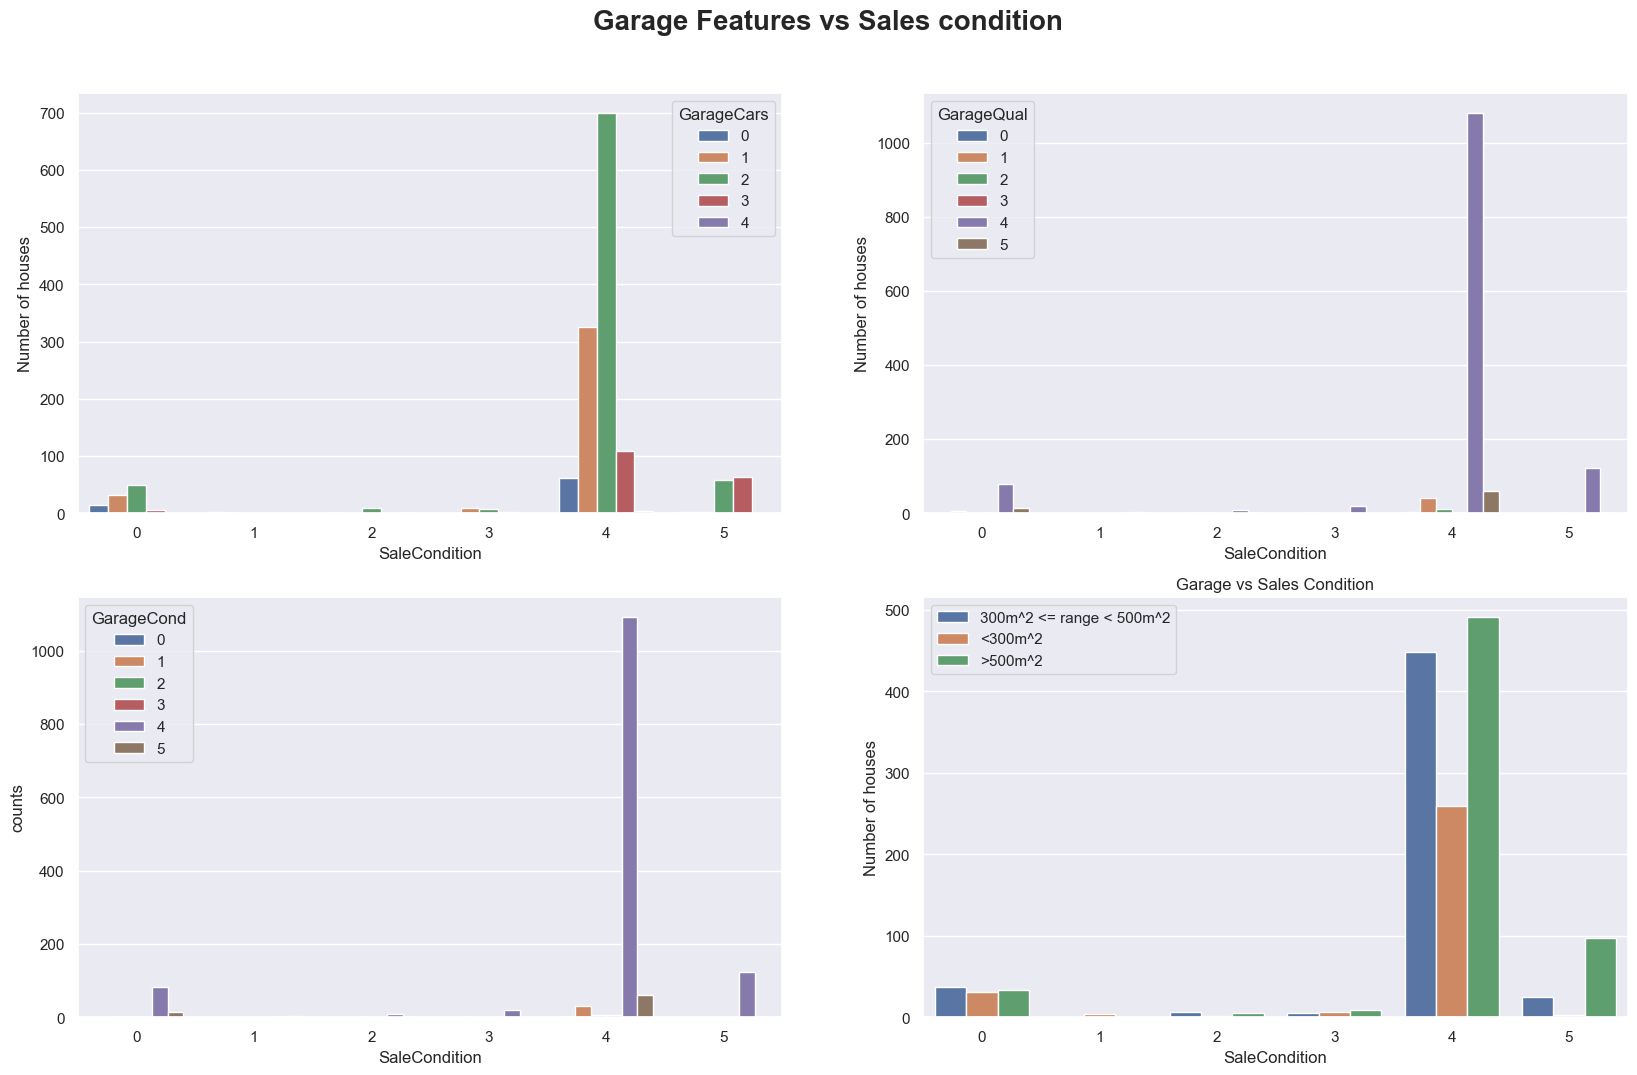

In [276]:
sns.set_theme()
sns.axes_style("darkgrid")
sns.despine()
def new_garage_area(data : pd.DataFrame) -> pd.DataFrame: 
    data["garage_range"] = "0" * data.shape[0]
    for row in range(data.shape[0]):
        if data.loc[row, "GarageArea"] < 300:
            data.at[row, "garage_range"] = "<300m^2"
        elif data.loc[row, "GarageArea"] >= 300 and  data.loc[row, "GarageArea"] < 500:
            data.at[row, "garage_range"] = "300m^2 <= range < 500m^2"
        else:
            data.at[row, "garage_range"] = ">500m^2" 
    return data


new_data = new_garage_area(new_data)

# korelasi antara GarageCars', 'GarageArea', 'GarageQual', 'GarageCond terhadap kondisi rumah yang dijuaal
fig, ax = plt.subplots(figsize = (20, 12), ncols=2, nrows=2)
fig.suptitle('Garage Features vs Sales condition', fontsize=20, y=0.95, fontweight ="bold")

# Membuat barplot menggunakan data yang sudah diagregasi
plt.title("Garage vs Sales Condition")
sns.barplot(data=new_data.groupby(['SaleCondition', 'GarageCars']).size().reset_index(name='counts'), x='SaleCondition', y='counts', hue='GarageCars', ax=ax[0, 0])
ax[0, 0].set_ylabel("Number of houses")


sns.barplot(data=new_data.groupby(['SaleCondition', 'GarageQual']).size().reset_index(name='counts'), x='SaleCondition', y='counts', hue='GarageQual', ax=ax[0, 1])
ax[0, 1].set_ylabel("Number of houses")



sns.barplot(data=new_data.groupby(['SaleCondition', 'garage_range']).size().reset_index(name='counts'), x='SaleCondition', y='counts', hue='garage_range', ax=ax[1, 1])
ax[1, 0].set_ylabel("Number of houses")



sns.barplot(data=new_data.groupby(['SaleCondition', 'GarageCond']).size().reset_index(name='counts'), x='SaleCondition', y='counts', hue='GarageCond', ax=ax[1, 0])
ax[1, 1].set_ylabel("Number of houses")
ax[1,1].legend(loc='upper left')


"""
note 
Abnormal: Merujuk pada kondisi atau situasi yang tidak biasa atau tidak lazim terkait dengan properti.
Adjland : proses pembelian sebidang tanah yang berbatasan langsung dengan properti yang sudah dimiliki oleh pembeli
Alloc: alokasi - dua properti terkait dengan akta terpisah" merujuk pada situasi di mana dua unit properti yang berbeda (biasanya unit kondominium dan unit garasi) dimiliki secara terpisah namun terkait.
Family  : Sale between family members
Normal : Normal Sale
Partial : Home was not completed when last assessed (associated with New Homes)

"""

"""
GarageQual: Garage quality
  Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage


GarageCond: Garage condition

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage

"""

"""
kesimpulan : 
terlihat bahwa Rumah yang dalam keadaan normal saat sales condition
"""



In [277]:
# house price vs garage features
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 82 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   int32  
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   int32  
 6   Alley          1460 non-null   int32  
 7   LotShape       1460 non-null   int32  
 8   LandContour    1460 non-null   int32  
 9   Utilities      1460 non-null   int32  
 10  LotConfig      1460 non-null   int32  
 11  LandSlope      1460 non-null   int32  
 12  Neighborhood   1460 non-null   int32  
 13  Condition1     1460 non-null   int32  
 14  Condition2     1460 non-null   int32  
 15  BldgType       1460 non-null   int32  
 16  HouseStyle     1460 non-null   int32  
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [278]:

# def convert_to_label_encoder(data: pd.DataFrame) -> pd.DataFrame:
#     for column in data.columns:
#         #  check jika data type == object dan check apakah termasuk tipe data kategorikal
#         if data[column].dtype == 'object' or pd.api.types.is_categorical_dtype(data[column]):
#             le = LabelEncoder()
#             data[column] = le.fit_transform(data[column])
#     return data 

# # Misalkan new_data adalah DataFrame Anda
# new_data_encode  = convert_to_label_encoder(new_data)

# new_data_encode.head()
# new_data = convert_to_label_encodder(new_data)
